In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)
print("Number of classes:", len(np.unique(y_train)))

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Number of classes: 10


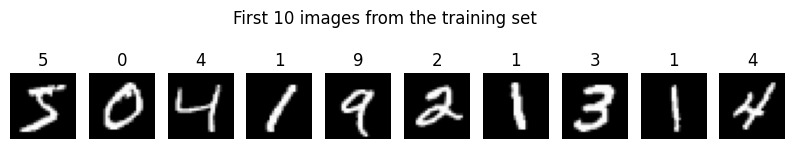

In [ ]:
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"{y_train[i]}")
    plt.axis('off')
plt.suptitle("First 10 images from the training set")
plt.show()

In [ ]:
x_train[0]

# **MLP Modeling**

In [ ]:

# Flatten images from (28, 28) to (784,)
x_train = x_train.reshape(-1, 28 * 28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype("float32") / 255.0

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
from tensorflow.keras.utils import to_categorical
# One-hot encode the labels (e.g. 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
# Train the model
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=128,
    validation_data = (x_test, y_test),

)


Epoch 1/100
469/469 - 7s - 15ms/step - accuracy: 0.9166 - loss: 0.2757 - val_accuracy: 0.9637 - val_loss: 0.1134
Epoch 2/100
469/469 - 6s - 12ms/step - accuracy: 0.9650 - loss: 0.1119 - val_accuracy: 0.9732 - val_loss: 0.0815
Epoch 3/100
469/469 - 1s - 3ms/step - accuracy: 0.9744 - loss: 0.0814 - val_accuracy: 0.9798 - val_loss: 0.0669
Epoch 4/100
469/469 - 1s - 3ms/step - accuracy: 0.9791 - loss: 0.0651 - val_accuracy: 0.9777 - val_loss: 0.0706
Epoch 5/100
469/469 - 1s - 3ms/step - accuracy: 0.9830 - loss: 0.0524 - val_accuracy: 0.9798 - val_loss: 0.0686
Epoch 6/100
469/469 - 1s - 3ms/step - accuracy: 0.9847 - loss: 0.0475 - val_accuracy: 0.9818 - val_loss: 0.0610
Epoch 7/100
469/469 - 1s - 3ms/step - accuracy: 0.9879 - loss: 0.0380 - val_accuracy: 0.9804 - val_loss: 0.0693
Epoch 8/100
469/469 - 1s - 3ms/step - accuracy: 0.9869 - loss: 0.0387 - val_accuracy: 0.9807 - val_loss: 0.0687
Epoch 9/100
469/469 - 3s - 5ms/step - accuracy: 0.9889 - loss: 0.0350 - val_accuracy: 0.9819 - val_los

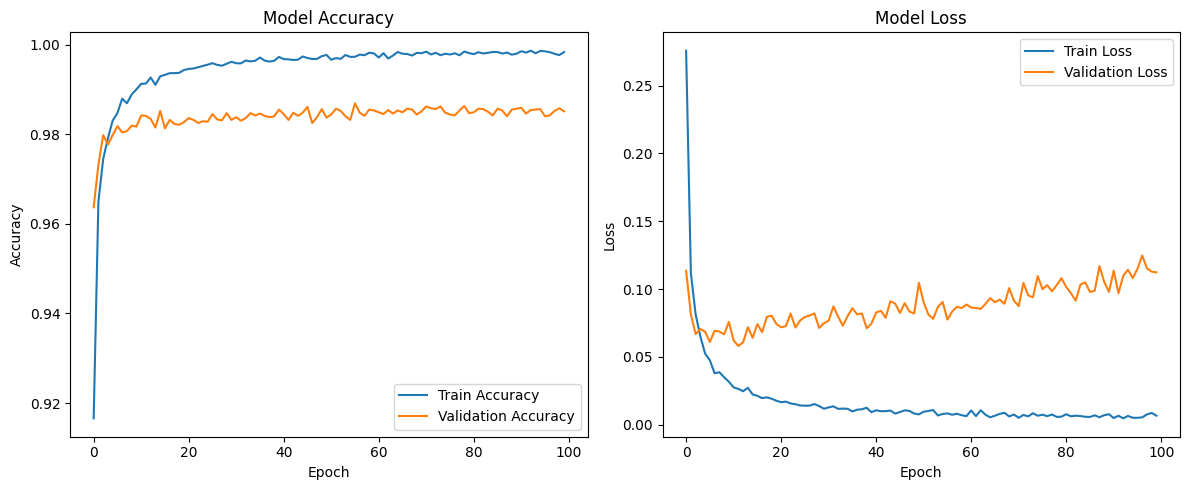

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# **CNN Modeling**

In [ ]:
# Load the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape to (28, 28, 1) and normalize
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the CNN model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
# Train the CNN model
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=2
)


Epoch 1/10
375/375 - 8s - 23ms/step - accuracy: 0.9183 - loss: 0.2658 - val_accuracy: 0.9802 - val_loss: 0.0665
Epoch 2/10
375/375 - 3s - 7ms/step - accuracy: 0.9724 - loss: 0.0913 - val_accuracy: 0.9837 - val_loss: 0.0521
Epoch 3/10
375/375 - 2s - 6ms/step - accuracy: 0.9793 - loss: 0.0691 - val_accuracy: 0.9865 - val_loss: 0.0485
Epoch 4/10
375/375 - 2s - 6ms/step - accuracy: 0.9826 - loss: 0.0556 - val_accuracy: 0.9868 - val_loss: 0.0414
Epoch 5/10
375/375 - 2s - 7ms/step - accuracy: 0.9860 - loss: 0.0454 - val_accuracy: 0.9883 - val_loss: 0.0420
Epoch 6/10
375/375 - 3s - 7ms/step - accuracy: 0.9862 - loss: 0.0434 - val_accuracy: 0.9886 - val_loss: 0.0405
Epoch 7/10
375/375 - 3s - 7ms/step - accuracy: 0.9880 - loss: 0.0388 - val_accuracy: 0.9899 - val_loss: 0.0386
Epoch 8/10
375/375 - 2s - 6ms/step - accuracy: 0.9894 - loss: 0.0332 - val_accuracy: 0.9904 - val_loss: 0.0341
Epoch 9/10
375/375 - 3s - 7ms/step - accuracy: 0.9901 - loss: 0.0303 - val_accuracy: 0.9899 - val_loss: 0.0402


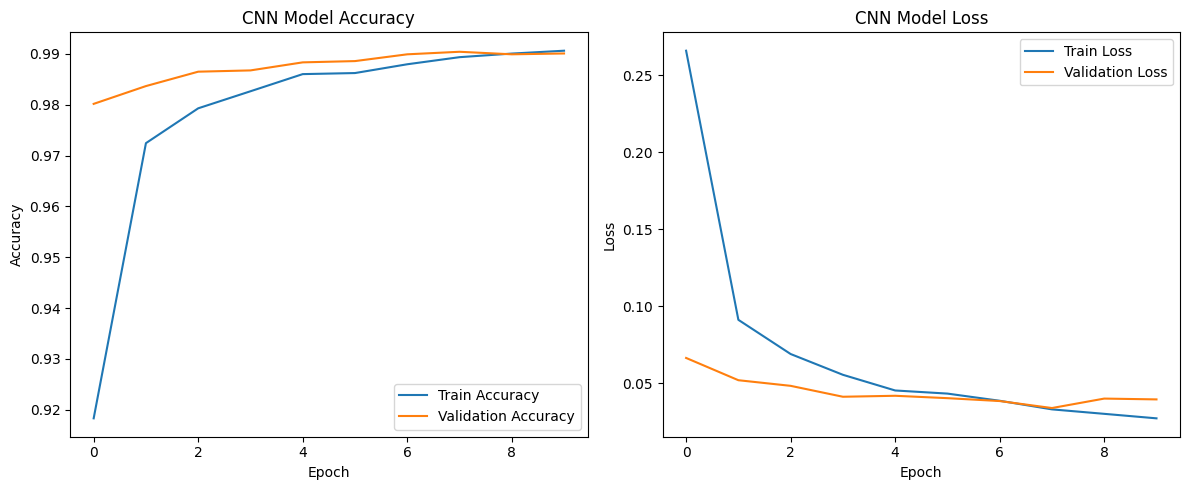

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Test Accuracy: 0.9928
Test Loss: 0.0295


In [ ]:
x_train[0].shape

(28, 28, 1)

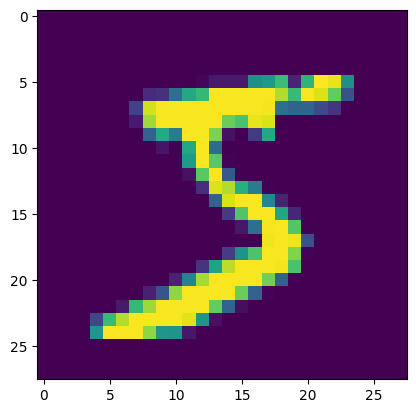

In [ ]:
plt.imshow(x_train[0].reshape(28, 28))

In [ ]:
model.predict(x_train[0].reshape(1, 28, 28, 1)).argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


np.int64(5)

#**CNN Modeling at 3D images**

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar100

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')  # 'fine' = 100 classes


print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)
print("Number of classes:", len(set(y_train.flatten())))


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Number of classes: 100


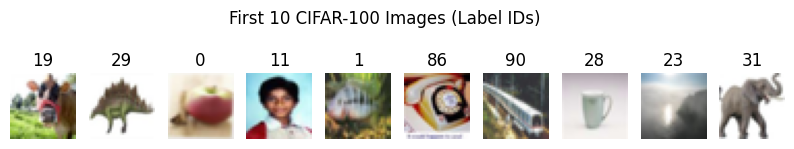

In [ ]:
# Plot first 10 images
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i])
    plt.title(str(y_train[i][0]))
    plt.axis('off')
plt.suptitle("First 10 CIFAR-100 Images (Label IDs)")
plt.show()

In [ ]:
from tensorflow.keras.utils import to_categorical

# Normalize pixel values to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    # Block 1
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Block 2
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),

    # Block 3
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.6),

    # Fully connected layers
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')  # 100 classes
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 644,388 (2.46 MB)

 Trainable params: 643,940 (2.46 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
# Train the model
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    verbose=2
)


Epoch 1/50
313/313 - 3s - 8ms/step - accuracy: 0.4333 - loss: 2.0977 - val_accuracy: 0.4428 - val_loss: 2.1622
Epoch 2/50
313/313 - 2s - 7ms/step - accuracy: 0.4345 - loss: 2.0751 - val_accuracy: 0.4550 - val_loss: 2.1137
Epoch 3/50
313/313 - 2s - 7ms/step - accuracy: 0.4413 - loss: 2.0604 - val_accuracy: 0.4431 - val_loss: 2.1879
Epoch 4/50
313/313 - 2s - 7ms/step - accuracy: 0.4419 - loss: 2.0445 - val_accuracy: 0.4723 - val_loss: 1.9854
Epoch 5/50
313/313 - 3s - 8ms/step - accuracy: 0.4475 - loss: 2.0266 - val_accuracy: 0.4731 - val_loss: 2.0047
Epoch 6/50
313/313 - 2s - 7ms/step - accuracy: 0.4513 - loss: 2.0138 - val_accuracy: 0.4618 - val_loss: 2.0577
Epoch 7/50
313/313 - 3s - 8ms/step - accuracy: 0.4560 - loss: 1.9916 - val_accuracy: 0.3981 - val_loss: 2.4038
Epoch 8/50
313/313 - 3s - 8ms/step - accuracy: 0.4606 - loss: 1.9736 - val_accuracy: 0.4855 - val_loss: 1.9345
Epoch 9/50
313/313 - 2s - 7ms/step - accuracy: 0.4604 - loss: 1.9730 - val_accuracy: 0.4794 - val_loss: 1.9676
E

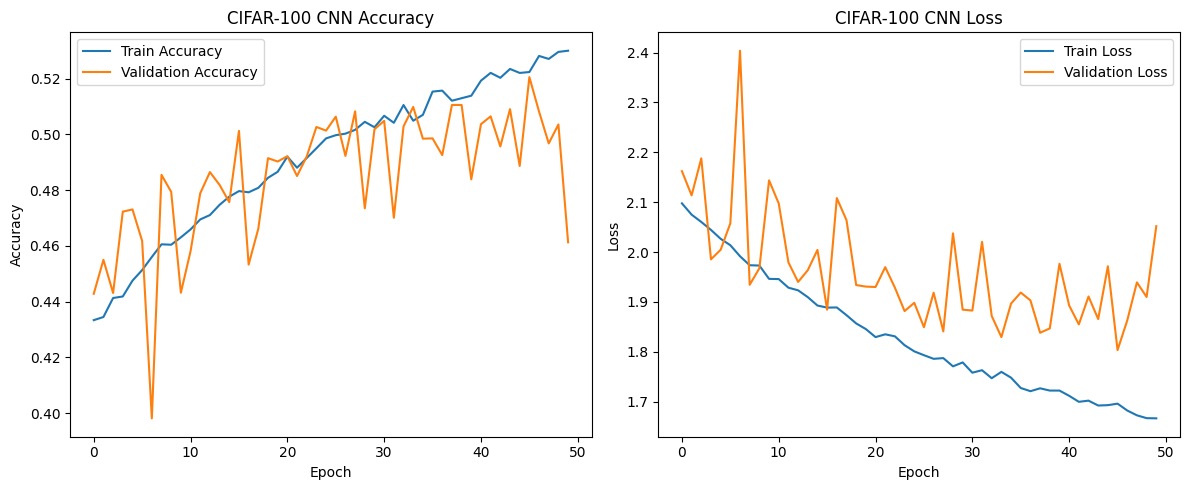

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CIFAR-100 CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CIFAR-100 CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Test Accuracy: 0.4729
Test Loss: 2.0342


# **Modeling at Image files**

In [ ]:
# https://www.kaggle.com/datasets/phucthaiv02/butterfly-image-classification?select=Training_set.csv
import kagglehub

# Download latest version
path = kagglehub.dataset_download("phucthaiv02/butterfly-image-classification")

print("Path to dataset files:", path)

100%|██████████| 226M/226M [00:11<00:00, 21.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/phucthaiv02/butterfly-image-classification/versions/2


In [ ]:
import pandas as pd
import os


df = pd.read_csv(path + "/Training_set.csv")

train_image_dir = path +"/train"

df.head()


,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART


In [ ]:
len(df['label'].unique())

75

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Training generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df,
    directory=train_image_dir,
    x_col="filename",
    y_col="label",
    target_size=(128, 128),
    class_mode="categorical",
    subset="training",
    shuffle=True
)

# Validation generator
val_generator = train_datagen.flow_from_dataframe(
    dataframe=df,
    directory=train_image_dir,
    x_col="filename",
    y_col="label",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    subset="validation",
    shuffle=True
)


Found 5200 validated image filenames belonging to 75 classes.
Found 1299 validated image filenames belonging to 75 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2

model = Sequential([

    Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    Conv2D(512, (3, 3), activation='relu',),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    GlobalAveragePooling2D(),
    Dense(128, activation='relu', kernel_regularizer= l2(0.0001)),
    Dropout(0.4),
    Dense(75, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 222, 222, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 109, 109, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 109, 109, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 52, 52, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 52, 52, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 24, 24, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 10, 10, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 10, 10, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 75)             │         9,675 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,221,259 (8.47 MB)

 Trainable params: 2,218,827 (8.46 MB)

 Non-trainable params: 2,432 (9.50 KB)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 30s 114ms/step - accuracy: 0.0866 - loss: 4.2192 - val_accuracy: 0.0123 - val_loss: 5.7073
Epoch 2/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.2543 - loss: 2.8986 - val_accuracy: 0.0339 - val_loss: 5.6852
Epoch 3/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.3658 - loss: 2.3401 - val_accuracy: 0.1817 - val_loss: 3.2898
Epoch 4/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.4481 - loss: 1.9821 - val_accuracy: 0.5096 - val_loss: 1.8071
Epoch 5/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.5331 - loss: 1.6259 - val_accuracy: 0.5242 - val_loss: 1.7373
Epoch 6/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.6114 - loss: 1.3690 - val_accuracy: 0.6574 - val_loss: 1.2622
Epoch 7/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.6581 - loss: 1.1816 - val_accuracy: 0.6567 - val_loss: 1.2378
Epoch 8/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.7057 - loss: 1.0181 - val_accuracy: 

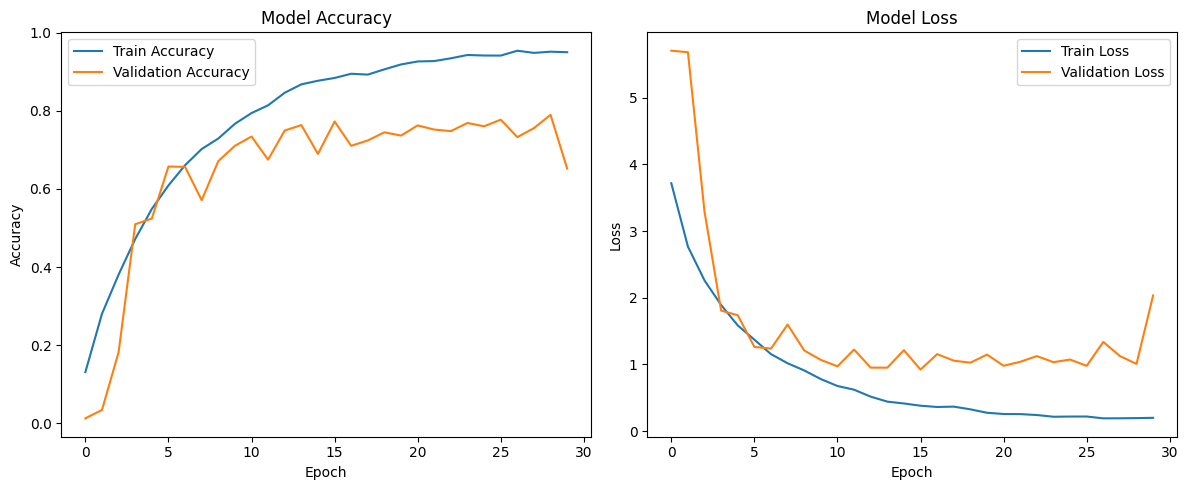

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
